In [44]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas
from torch import nn

In [23]:
 torch.__version__

'2.3.1+cu121'

In [24]:
## known variables

weight = 0.7
bias = 0.3

## creating a linear model
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(1)
y = weight * X + bias

In [25]:
X.shape, y.shape

(torch.Size([50, 1]), torch.Size([50, 1]))

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8)

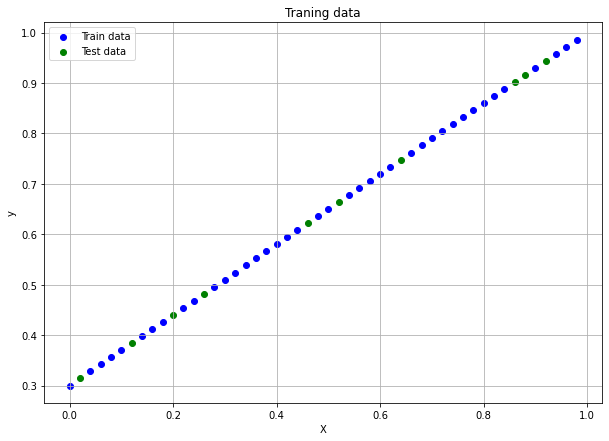

In [27]:
def plot_prediction(train_data = X_train, train_label = y_train, test_data = X_test, test_label = y_test, prediction = None):
    plt.figure(figsize=(10, 7))
    
    plt.scatter(train_data, train_label, c="b", label = "Train data")
    plt.scatter(test_data, test_label, c="g", label = "Test data")

    if prediction != None:
        plt.scatter(test_data, prediction, c="purple", label = "Test data")
        
    
    plt.xlabel("X")
    plt.ylabel("y")
    plt.grid()
    plt.title("Traning data")
    plt.legend()

plot_prediction(X_train, y_train, X_test, y_test)

In [28]:
# linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype= torch.float, requires_grad = True))
        self.bias = nn.Parameter(torch.randn(1, dtype = torch.float, requires_grad = True))

    def forward(self, x: torch.tensor) -> torch.tensor:
        return self.weights * x + self.bias

In [29]:
model_0 = LinearRegressionModel()

In [30]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.4781], requires_grad=True),
 Parameter containing:
 tensor([-1.1399], requires_grad=True)]

In [31]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.4781])), ('bias', tensor([-1.1399]))])

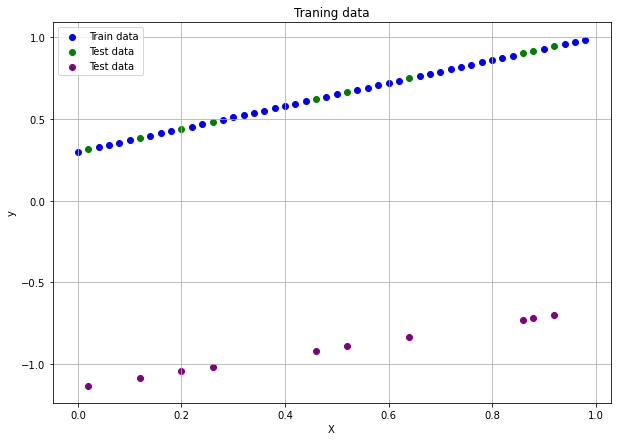

In [32]:
with torch.inference_mode():
    y_preds = model_0.forward(X_test)

    
y_preds

plot_prediction(prediction= y_preds)
# 

In [33]:
# loss function
loss_fn = nn.L1Loss()

# optimiser
optimizer = torch.optim.SGD(params=model_0.parameters(),lr= 0.01)

In [34]:
ephocs_count = []
train_loss_values = []
test_loss_values = []

ephocs = 500

for ephoc in range(ephocs):
    model_0.train() # pytorch will start tracking parameters and optimize for gradient decent

    # forward pass
    y_preds =  model_0.forward(X_train)

    # calculate the loss
    loss = loss_fn(y_preds, y_train)

    # reset the optimizer to zero
    optimizer.zero_grad()

    # loss backward 
    loss.backward()

    # steps the optimizer (perform the gradient decent)
    optimizer.step()

    # update the parameters
    model_0.eval()

    # stop parameter tracking
    with torch.inference_mode():
        # calcualte the loss on test set
        y_preds_ = model_0(X_test)

        # calculate lass
        loss_test = loss_fn(y_test, y_preds_)

    if ephoc % 10 == 0:
        print(f"Epochs = {ephoc} | Loss = {loss_test} | Params = {model_0.state_dict()}")
        ephocs_count.append(ephoc)
        train_loss_values.append(loss)
        test_loss_values.append(loss_test)

Epochs = 0 | Loss = 1.5358095169067383 | Params = OrderedDict([('weights', tensor([0.4830])), ('bias', tensor([-1.1299]))])
Epochs = 10 | Loss = 1.4118732213974 | Params = OrderedDict([('weights', tensor([0.5321])), ('bias', tensor([-1.0299]))])
Epochs = 20 | Loss = 1.2879369258880615 | Params = OrderedDict([('weights', tensor([0.5811])), ('bias', tensor([-0.9299]))])
Epochs = 30 | Loss = 1.1640007495880127 | Params = OrderedDict([('weights', tensor([0.6302])), ('bias', tensor([-0.8299]))])
Epochs = 40 | Loss = 1.0400645732879639 | Params = OrderedDict([('weights', tensor([0.6792])), ('bias', tensor([-0.7299]))])
Epochs = 50 | Loss = 0.9161283373832703 | Params = OrderedDict([('weights', tensor([0.7283])), ('bias', tensor([-0.6299]))])
Epochs = 60 | Loss = 0.7921921014785767 | Params = OrderedDict([('weights', tensor([0.7773])), ('bias', tensor([-0.5299]))])
Epochs = 70 | Loss = 0.6682558059692383 | Params = OrderedDict([('weights', tensor([0.8264])), ('bias', tensor([-0.4299]))])
Epoc

In [35]:
with torch.inference_mode():
    y_preds_ = model_0(X_test)
    
    loss = loss_fn(y_test, y_preds_)

In [36]:
y_preds_

tensor([[0.6307],
        [0.9134],
        [0.4469],
        [0.9275],
        [0.4893],
        [0.3904],
        [0.3197],
        [0.7579],
        [0.6731],
        [0.9558]])

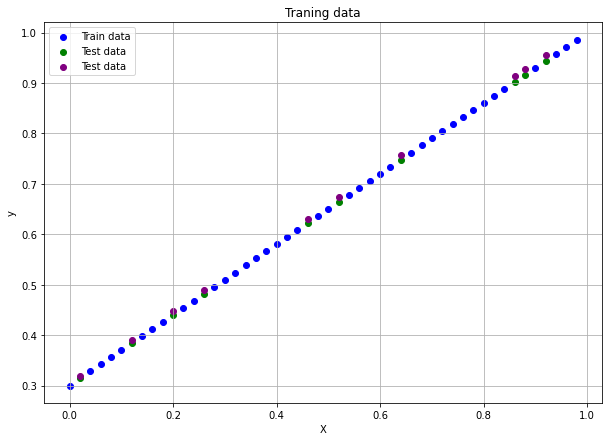

In [37]:
plot_prediction(prediction= y_preds_)

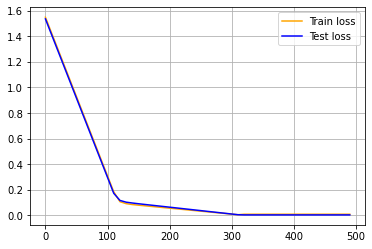

In [53]:
plt.plot(ephocs_count, np.array(torch.tensor(train_loss_values).numpy()), c = "orange", label = "Train loss")
plt.plot(ephocs_count, np.array(torch.tensor(test_loss_values).numpy()), c = 'blue', label = "Test loss")
plt.grid()
plt.legend()

In [58]:
# saving a model
from pathlib import Path

# creating a model_directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# creating model save path
MODEL_NAME = "my_model_01.pt"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# save the models state_dict()
print(f"Saving to {MODEL_SAVE_PATH}")
torch.save(obj= model_0.state_dict(), f= MODEL_SAVE_PATH)

Saving to models/my_model_01.pt


In [71]:
model__0 = LinearRegressionModel()
model__0.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

<All keys matched successfully>

In [73]:
model__0.state_dict()

OrderedDict([('weights', tensor([0.7068])), ('bias', tensor([0.3056]))])

In [59]:
del(model__0)